In [2]:
import pandas as pd
df = pd.read_csv("../data/processed data/processed_data.csv")
df.head()

,date,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,mean_consumption,median_consumption,std_consumption,day,holiday
0,2011-11-23,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,7.063833,6.2460,5.373299,2,0
1,2011-11-24,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,8.426043,7.4890,6.219456,3,0
2,2011-11-25,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,9.350267,8.7385,6.377867,4,0
3,2011-11-26,9.416667,6.333333,81.745833,4.3,66.9,12.9,0,10.255256,9.4770,6.689567,5,0
4,2011-11-27,9.904167,5.004167,73.425000,0.5,46.8,13.9,0,10.946154,9.8030,7.351755,6,0


In [3]:
df['date'] = pd.to_datetime(df['date'])

# Data Preprocessing

In [4]:
import numpy as np

class CyclicDateEncoder:
    def __init__(self, date_column='date'):
        self.date_column = date_column

    def _cyclic_encode(self, values, max_value):
        """
        Generates sine and cosine encoding for cyclic values.
        """
        sin_values = np.sin(2 * np.pi * values / max_value)
        cos_values = np.cos(2 * np.pi * values / max_value)
        return sin_values, cos_values

    def add_cyclic_features(self, df):
        """
        Adds cyclic encoding columns for month, day of month, and day of week.
        """
        # Extract date parts
        df['day_of_month'] = df[self.date_column].dt.day
        df['month'] = df[self.date_column].dt.month
        df['day_of_week'] = df[self.date_column].dt.weekday

        # Cyclic encoding
        df['month_sin'], df['month_cos'] = self._cyclic_encode(df['month'], 12)
        df['day_of_week_sin'], df['day_of_week_cos'] = self._cyclic_encode(df['day_of_week'], 7)

        # Optionally, drop the intermediate columns if you only want sin/cos
        df.drop(columns=['month', 'day_of_month', 'day_of_week'], inplace=True)

        return df

encoder = CyclicDateEncoder(date_column='date')
df = encoder.add_cyclic_features(df)

df.head()

,date,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,mean_consumption,median_consumption,std_consumption,day,holiday,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,2011-11-23,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,7.063833,6.2460,5.373299,2,0,-0.5,0.866025,0.974928,-0.222521
1,2011-11-24,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,8.426043,7.4890,6.219456,3,0,-0.5,0.866025,0.433884,-0.900969
2,2011-11-25,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,9.350267,8.7385,6.377867,4,0,-0.5,0.866025,-0.433884,-0.900969
3,2011-11-26,9.416667,6.333333,81.745833,4.3,66.9,12.9,0,10.255256,9.4770,6.689567,5,0,-0.5,0.866025,-0.974928,-0.222521
4,2011-11-27,9.904167,5.004167,73.425000,0.5,46.8,13.9,0,10.946154,9.8030,7.351755,6,0,-0.5,0.866025,-0.781831,0.623490


In [5]:
drop_cols = ["day", "date"]
df.drop(columns=['date'], inplace=True)

In [6]:
df.columns

Index(['air_temperature_mean', 'dewpoint_mean', 'rltv_hum_mean',
       'air_temperature_min', 'rltv_hum_min', 'air_temperature_max',
       'prcp_count', 'mean_consumption', 'median_consumption',
       'std_consumption', 'day', 'holiday', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos'],
      dtype='object')

In [7]:
df.head()

,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,mean_consumption,median_consumption,std_consumption,day,holiday,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,7.063833,6.2460,5.373299,2,0,-0.5,0.866025,0.974928,-0.222521
1,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,8.426043,7.4890,6.219456,3,0,-0.5,0.866025,0.433884,-0.900969
2,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,9.350267,8.7385,6.377867,4,0,-0.5,0.866025,-0.433884,-0.900969
3,9.416667,6.333333,81.745833,4.3,66.9,12.9,0,10.255256,9.4770,6.689567,5,0,-0.5,0.866025,-0.974928,-0.222521
4,9.904167,5.004167,73.425000,0.5,46.8,13.9,0,10.946154,9.8030,7.351755,6,0,-0.5,0.866025,-0.781831,0.623490


In [8]:
# extracting the features only
features = ['air_temperature_mean', 'dewpoint_mean', 'rltv_hum_mean',
       'air_temperature_min', 'rltv_hum_min', 'air_temperature_max',
       'prcp_count', 'holiday', 'month_sin',
       'month_cos', 'day_of_week_sin', 'day_of_week_cos']
features_df = df[features]
features_df.head(3)

,air_temperature_mean,dewpoint_mean,rltv_hum_mean,air_temperature_min,rltv_hum_min,air_temperature_max,prcp_count,holiday,month_sin,month_cos,day_of_week_sin,day_of_week_cos
0,5.925000,5.208333,95.250000,2.4,82.3,10.6,0,0,-0.5,0.866025,0.974928,-0.222521
1,9.670833,8.041667,90.112500,6.1,74.5,13.6,2,0,-0.5,0.866025,0.433884,-0.900969
2,10.541667,6.891667,78.779167,6.1,59.8,13.0,2,0,-0.5,0.866025,-0.433884,-0.900969


In [9]:
# extracting the targets
target = ['mean_consumption', 'median_consumption',
       'std_consumption']
target_df = df[target]
target_df.head(3)

,mean_consumption,median_consumption,std_consumption
0,7.063833,6.2460,5.373299
1,8.426043,7.4890,6.219456
2,9.350267,8.7385,6.377867


In [10]:
len(target_df), len(features_df)

(827, 827)

In [11]:
# experiment with one target only
one_target_df= target_df["mean_consumption"]

# Model Training

In [12]:
# 1. XGBOOST model

In [13]:
!pip install xgboost


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features_df, one_target_df, test_size=0.2)

In [65]:
def check_model(model, X_train=X_train, y_train=y_train, X_test = X_test, y_test = y_test, features= features_df, target=one_target_df, cv=5, return_model=False):
    cv_scores = cross_val_score(model, features_df, target, cv=5, scoring='neg_mean_squared_error')
    print("Cross-validation scores (negative MSE):", cv_scores)
    print("Mean MSE across all folds:", -cv_scores.mean())
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(f"The r-squared value for the prediction is: {r2_score(y_test, prediction)}")
    plt.scatter(y_test, prediction)
    plt.xlabel("actual")
    plt.ylabel("prediction")
    plt.grid(alpha=0.1)
    plt.xlim((5,15))
    plt.ylim(5,15)
    plt.show();
    if return_model:
        return model

Cross-validation scores (negative MSE): [-1.43922743 -0.13707026 -0.58527141 -0.22261886 -0.44086475]
Mean MSE across all folds: 0.5650105392493204
The r-squared value for the prediction is: 0.9051538903840063


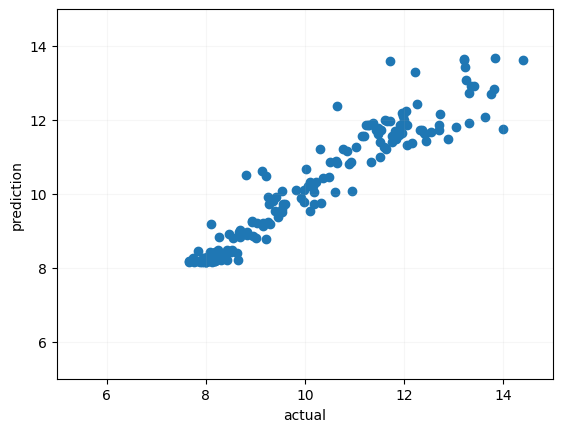

In [66]:
model = XGBRegressor(eta = 0.1, gamma = 4)
XGB_trained = check_model(model=model, cv=5, return_model=True)

In [ ]:
# Linear Regression

Cross-validation scores (negative MSE): [-1.24013336 -0.21589654 -0.27645183 -0.51016864 -0.56284112]
Mean MSE across all folds: 0.5610982980130553
The r-squared value for the prediction is: 0.8794633201870241


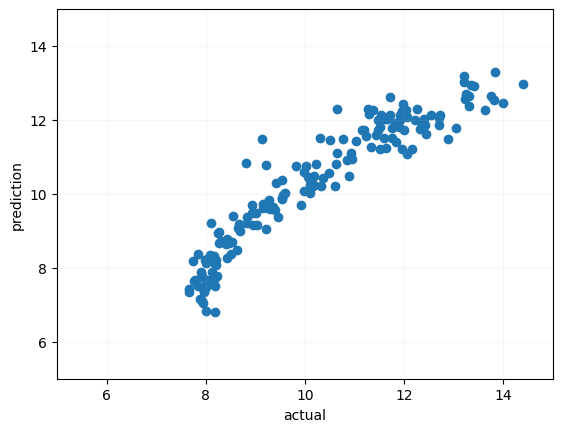

In [72]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model_trained = check_model(model=lr_model, return_model=True)

In [ ]:
# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures


Cross-validation scores (negative MSE): [-1.24013336 -0.21589654 -0.27645183 -0.51016864 -0.56284112]
Mean MSE across all folds: 0.5610982980130553
The r-squared value for the prediction is: 0.8693236387750859


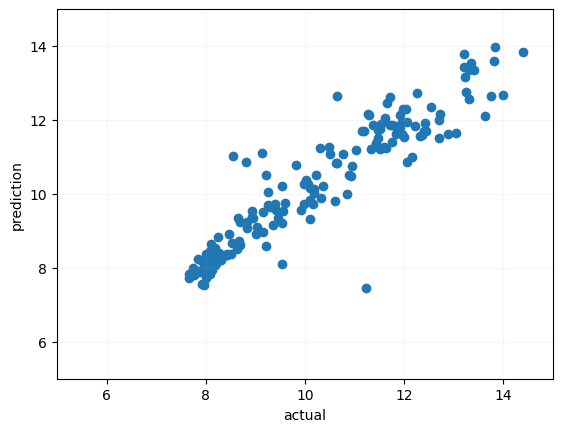

In [68]:
lr2_model = LinearRegression()
pr_model = PolynomialFeatures(degree=2)
X_train_poly = pr_model.fit_transform(X_train)
features_poly = pr_model.fit_transform(features_df)
X_test_poly = pr_model.fit_transform(X_test)
lr2_model = LinearRegression()
poly_model = check_model(model=lr2_model, X_train=X_train_poly, X_test=X_test_poly, features=features_poly, return_model=True)

# Conclusion

In [ ]:
# All the models pereformed well on baseline, and with proper tuning,  XGBOOST turned out to be the highest performer

In [ ]:
# Visualizing the prediction by different models

In [76]:
df = pd.read_csv("../data/processed data/processed_data.csv")
df["date"] = pd.to_datetime(df["date"])
df = encoder.add_cyclic_features(df)


In [ ]:
# XGBOOST

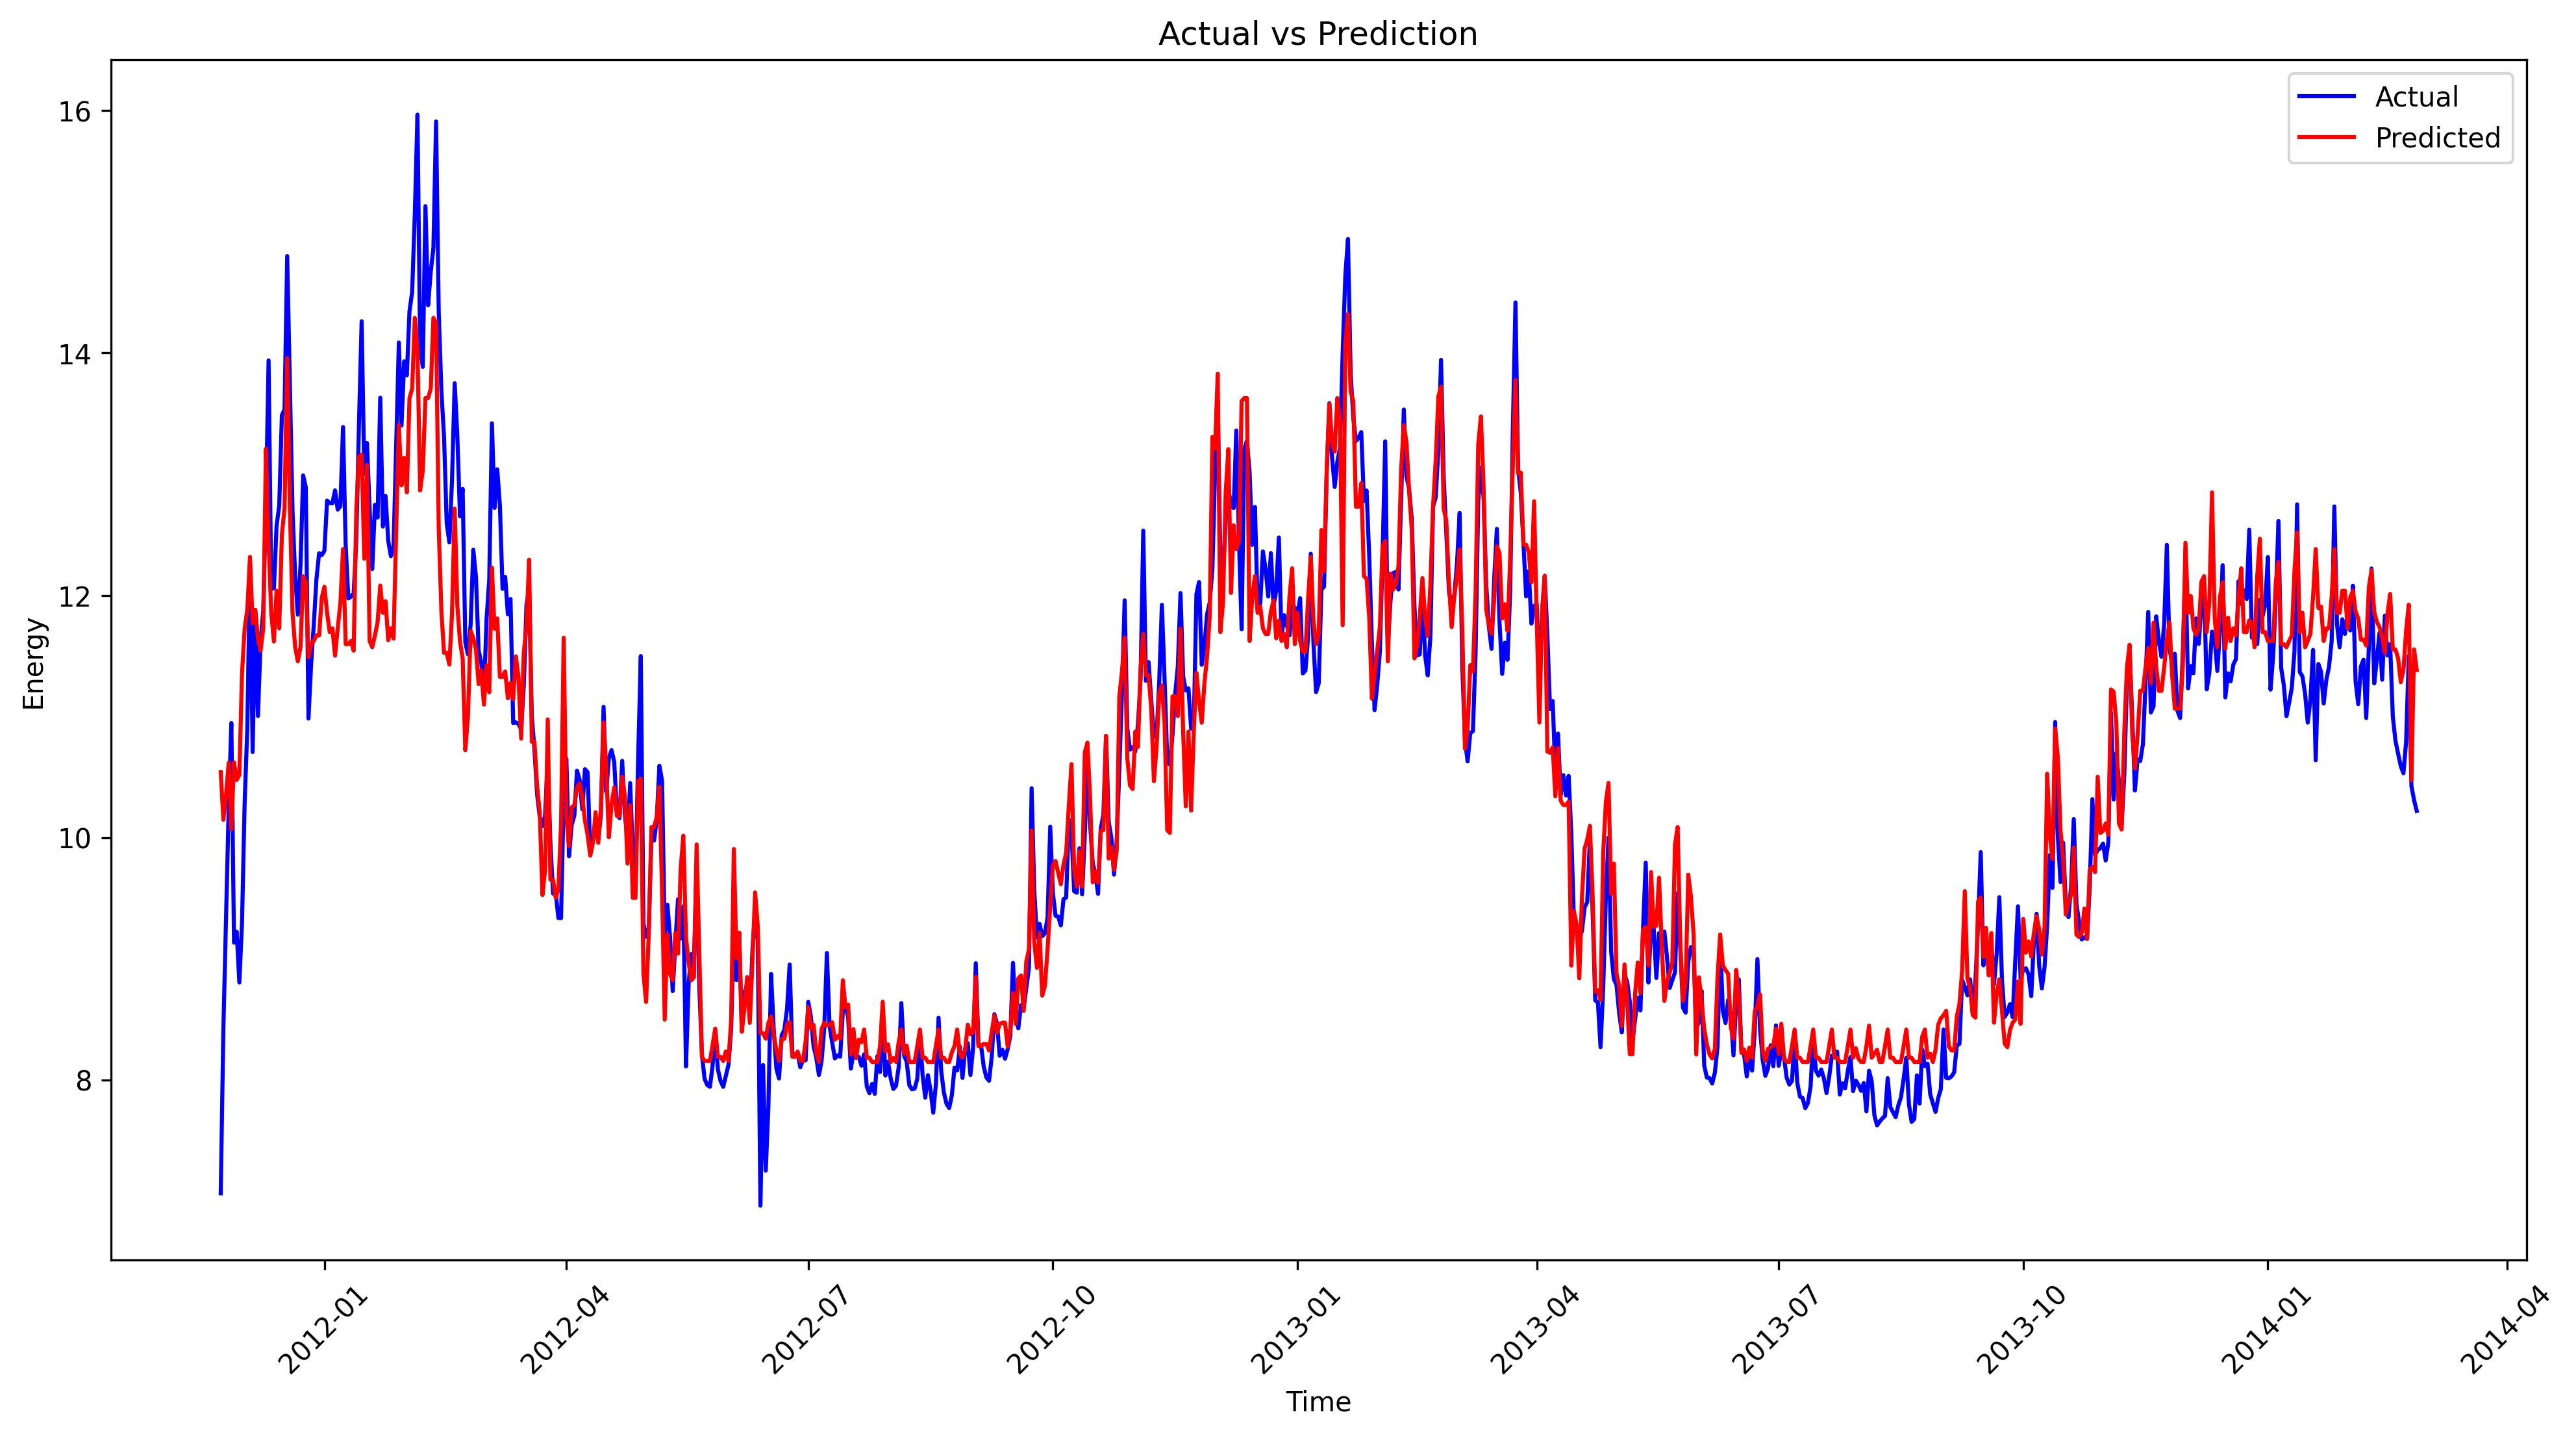

In [84]:
# Visulaizing energy forcasting using the trained models
def visualize_prediction(features, label, model, df=df):
    predictions = model.predict(features)
    plt.figure(figsize=(16,8), dpi = 300)
    plt.plot(df["date"],df["mean_consumption"], color="blue", label = "Actual")
    plt.plot(df["date"], predictions, color = "red", label = "Predicted")
    plt.legend()
    plt.xticks(rotation=45)
    plt.title("Actual vs Prediction")
    plt.xlabel("Time")
    plt.ylabel("Energy")

visualize_prediction(df = df, features=features_df, label=one_target_df, model=XGB_trained)


In [ ]:
# Linear Regression

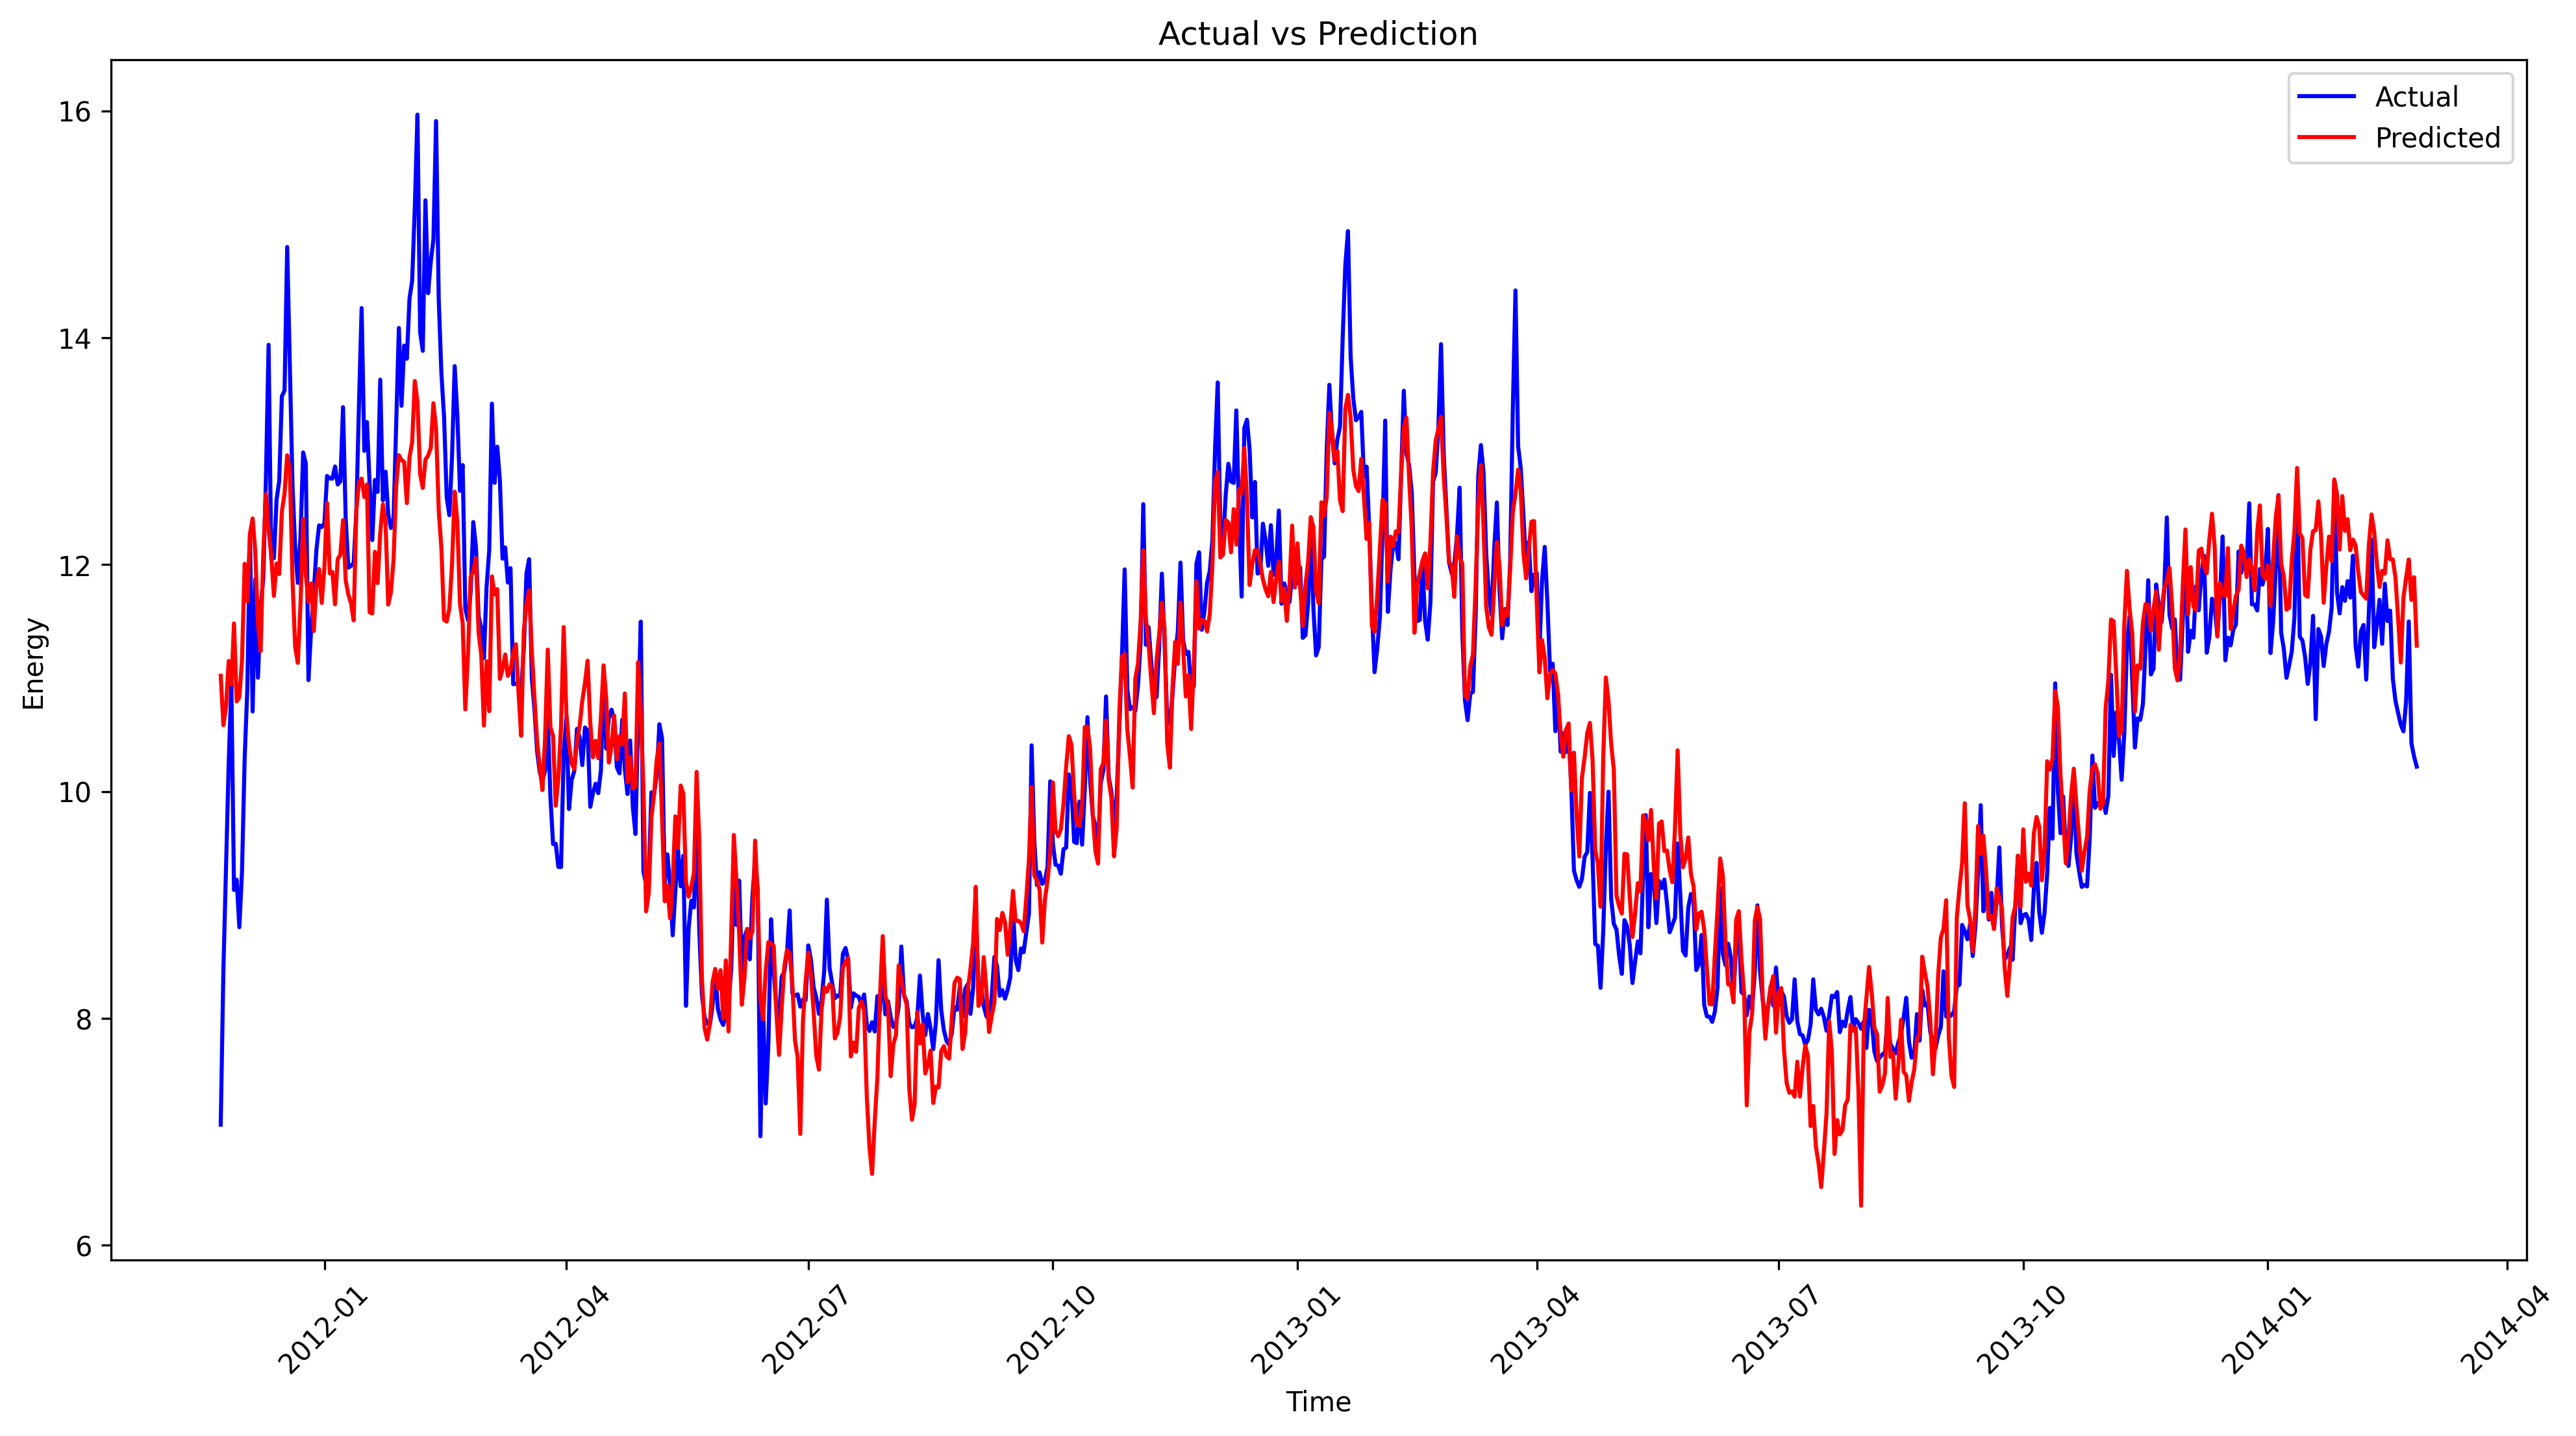

In [85]:
visualize_prediction(features=features_df, label=one_target_df, model=lr_model_trained)

In [ ]:
# Polynomial Regression

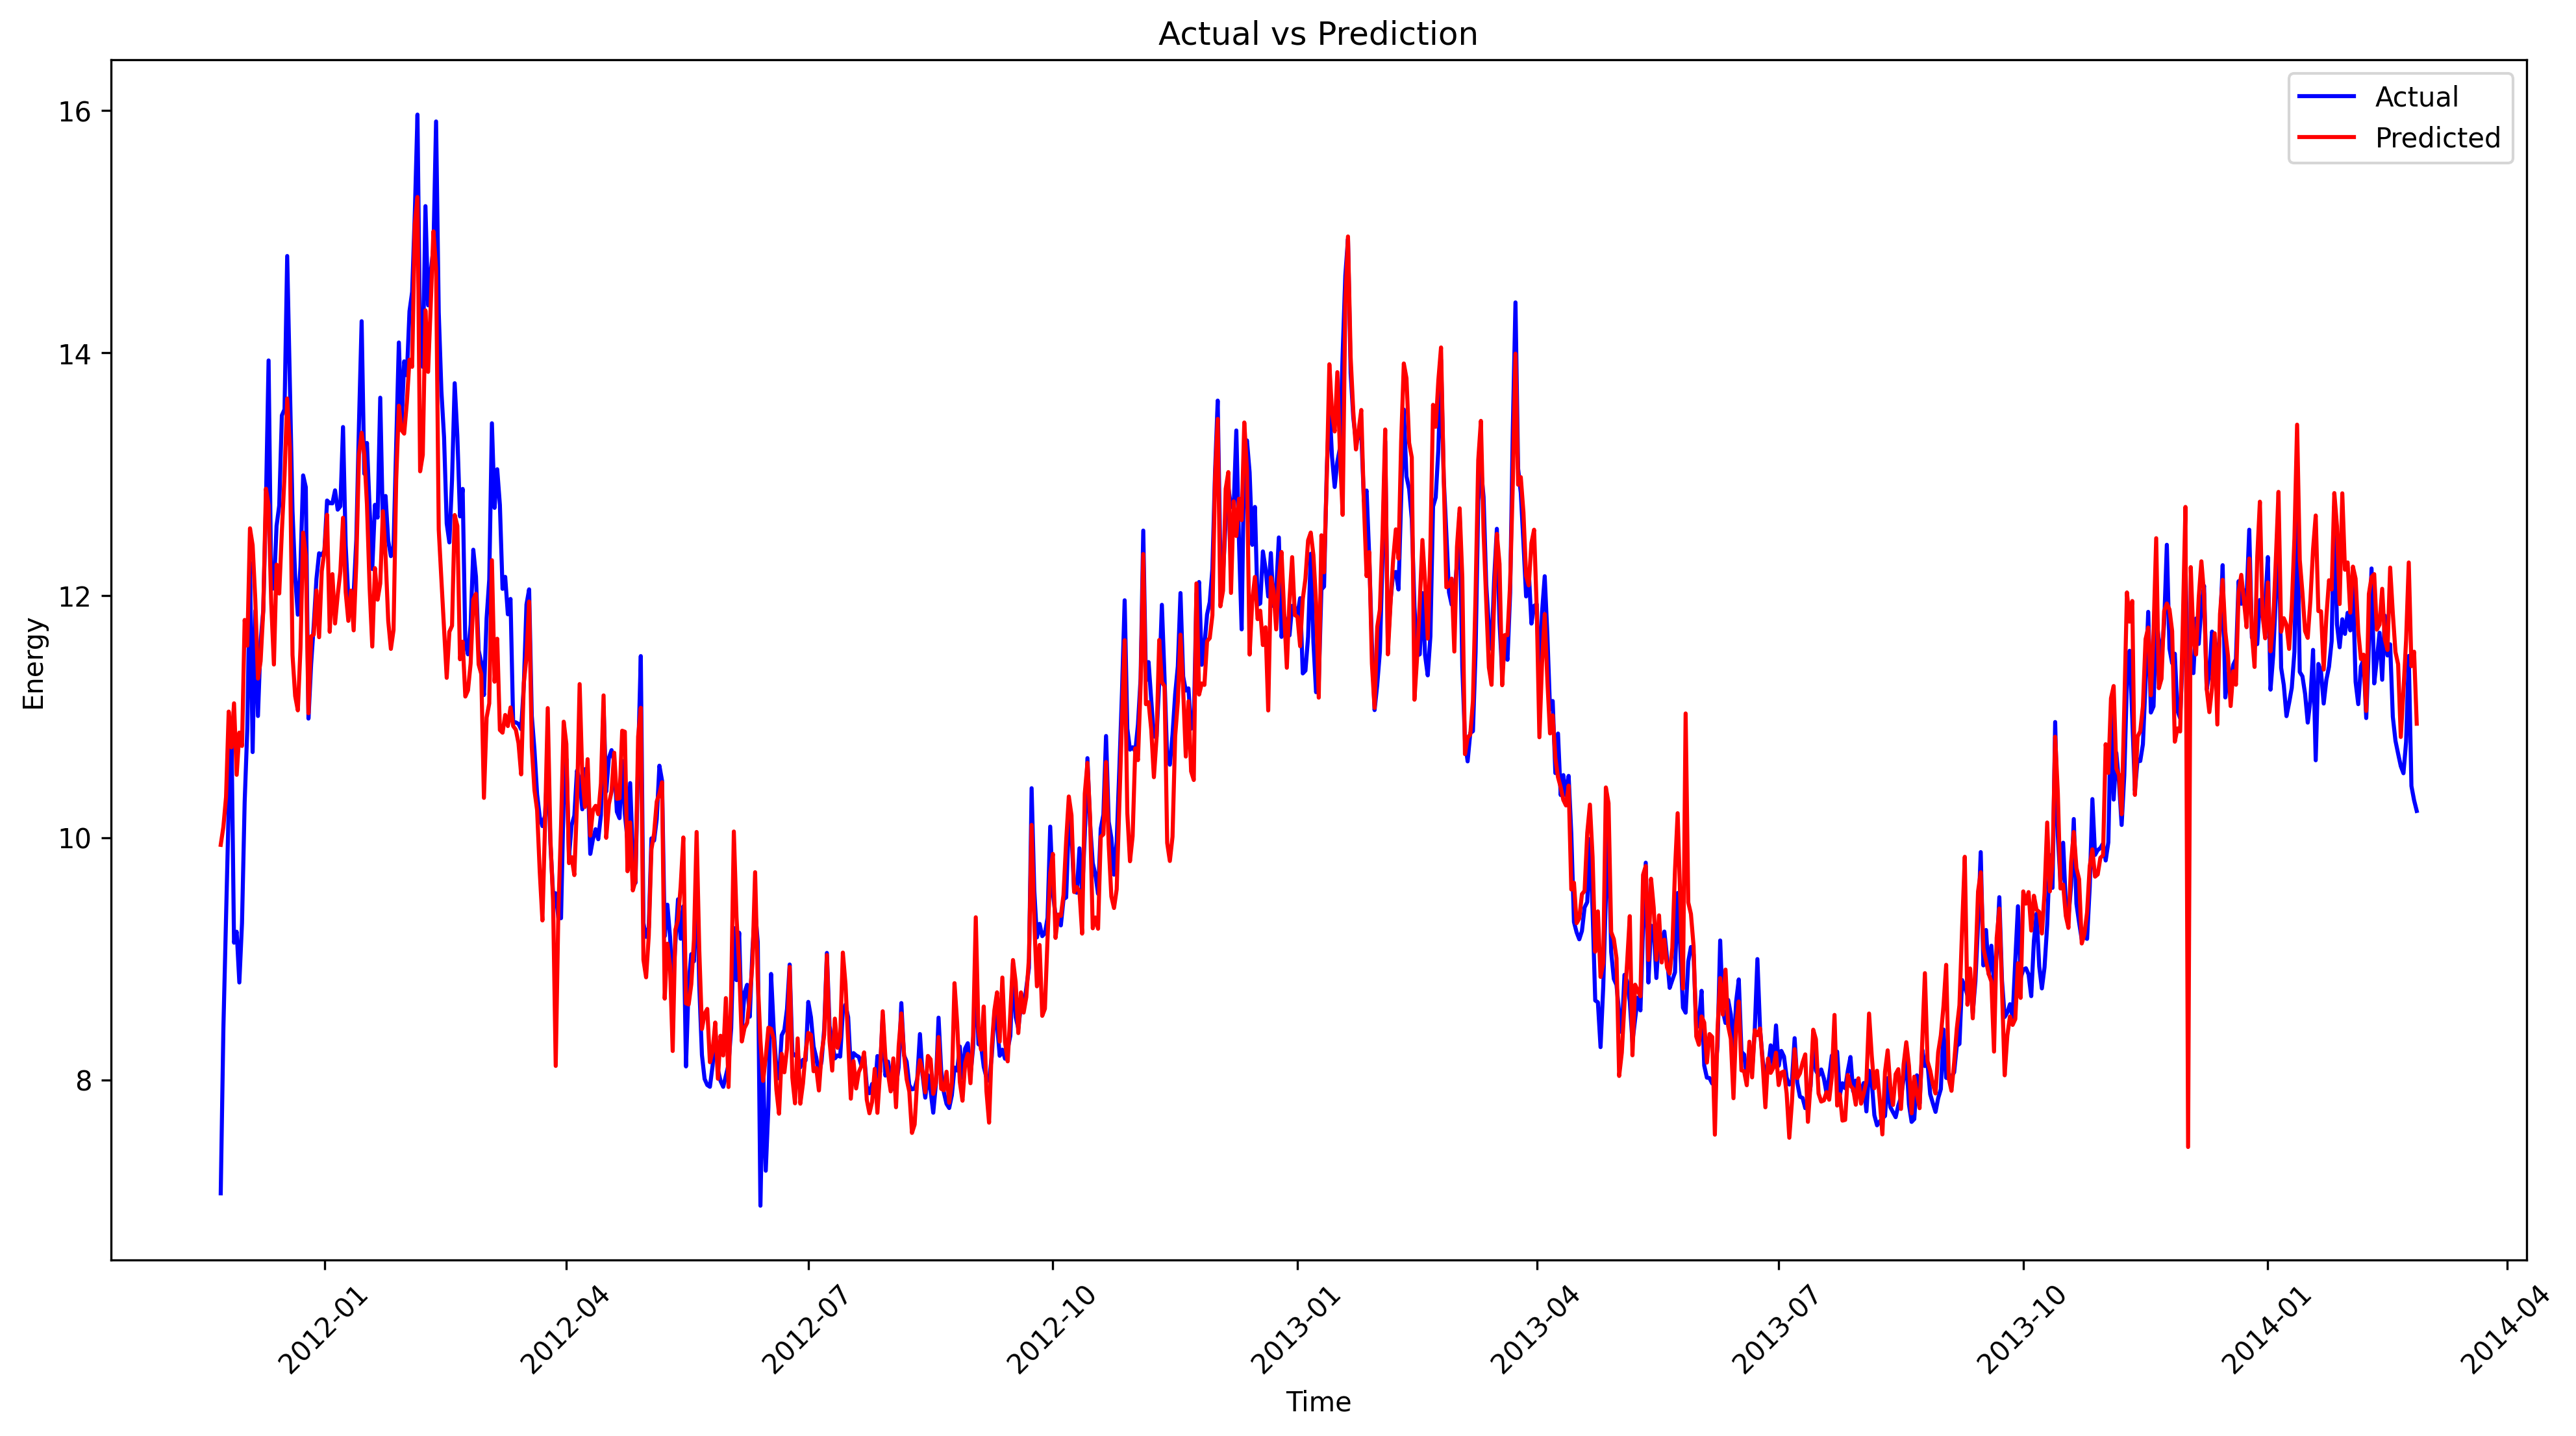

In [86]:
visualize_prediction(features=features_poly, label=one_target_df, model=poly_model)